**Goal:** Introduce concepts of probability and random
  processes in the context of model physical systems. 
  
- Start with the simplest model: the intoxicated walk.  
- Each step is of equal length $l$ and independent of the preceding step.
- At each interval the walker has a probability $p$ of a step to
  the right and probability $q=1-p$ of a step to the left.
- Let $n_r$ be the number steps to the right and $n_l$ be the
  number of steps to the left.  
-  The total number of steps is $N = n_r + n_l$ and the net
  displacement is $x = (n_r - n_l)/l$ where $-Nl \le x \le Nl$.
- The main quantity of interest is the probability $P_N(x)$ that
  after $N$ steps, the walker has undergone a net displacement $x$.
  
- The mean net displacement is ($\sum P_N(x) = 1$)

\begin{equation*}
\langle x_N \rangle = \sum_{x = -Nl}^{Nl} x P_N(x)
\end{equation*}

- The variance is

\begin{equation*}
\langle \Delta x_N^2 \rangle = \langle x_N^2 \rangle - \langle x_N \rangle^2
\end{equation*}

where

\begin{equation*}
\langle x_N^2 \rangle = \sum_{x = -Nl}^{Nl} x^2 P_N(x)
\end{equation*}

-  The averages are over all possible walks of $N$ steps.

-  For the symmetric case, $p = q = 1$, $\langle x_N \rangle = 0$.

## Exercise 1: 1-D random walk

1. Comment the program below and plot $P_N(x)$ for $ntrials = [10,100,1000,10000].$

2. Normalize $P_N(x)$ such that $\sum P_N(x) = 1.0$.

3. Determine $\langle x_N \rangle$ and $\langle \Delta x_N^2 \rangle$.  Compare with the analytical results (e.g., Reif, Fundamentals of Statistical and
  Thermal Physics),

\begin{equation*}
\langle x_N \rangle = (p - q)Nl
\end{equation*}

and

\begin{equation*}
\langle \Delta x_N^2 \rangle = 4pqNl^2
\end{equation*}

4. Determine the number of trials necessary to obtain $\langle \Delta x^2 \rangle$ to 1\% accuracy. 

5. Show that $P_N(x)$ can be approximated by a Gaussian distribution
\begin{equation*}
P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x- \langle x \rangle)^2/(2 \sigma^2)}
\end{equation*}
where $\sigma^2 = \langle \Delta x^2 \rangle$.  Does the fit work equally well for all $x$?


6. Suppose that $p= 0.7$.  Compute $\langle x_N \rangle$, $\langle x_N^2 \rangle$, and $\langle \Delta x_N^2 \rangle$.


<BarContainer object of 129 artists>

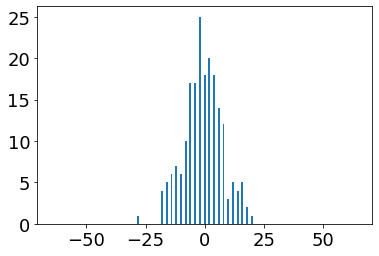

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
#----------------------------------------------------------------------------------------------------------------------
def mean_x(x,pN):
    #add code for <xN> and <xN^2> #(Exercise 1; Part 3)
    xN = 0                                  #(average of) xN
    xN2 = 0                                 #(average of) xN^2
    for m in range(len(x)):                 #from -Nl to Nl
        xN += x[m]*pN[m]                        #x*PN(x)
        xN2 +=(x[m]**2)*pN[m]                   #x^2*PN(x)
    dxsn = xN2 - (xN**2)                    #(average of) dxsn = delta x(sub)n
    return xN, xN2, dxsn

def get_pN(x,ntrial):       #I added "ntrial" to variables asked, so plotting different # of trials would be easier
    pN = np.zeros(len(x))                   #starts pN with array of zeros with size of length x
    wh = np.where(x == 0.0)                 #index where x = 0.0
    for _ in range(ntrial):                 #for each trial
        i = wh[0]                           #i reset to (the first time) x = 0
        for _ in range(N):                  #for total number of step (each trial)
            if (rnd.random() <= p):             #if number generated is <= to the probability of right step
                i = i+1                         #i = index of displacment x travelled (+1 = one direction)
            else:
                i = i-1                         #(-1 = the opposite direction)
        pN[i] += 1.0                        #increase probability of traveling x[i]
    return pN                               #pN[i]= probability that walker travelled x, after N steps
#----------------------------------------------------------------------------------------------------------------------
p = 0.5             #probability for right step
q = 1-p             #probability for left step
N = 64              #Total Number of steps
l = 1               #length of each step
ntrial = 200        #number of trials

x = np.arange(-N,(N+1),1)                  #x-values (net displacement values) (-Nl to Nl)
pN = get_pN(x,ntrial)

plt.figure()
plt.bar(x,pN)

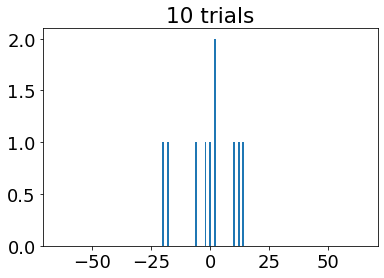

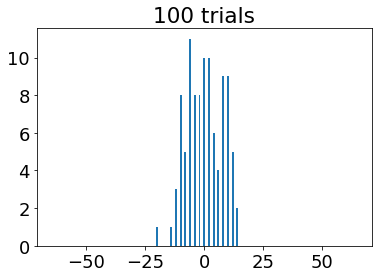

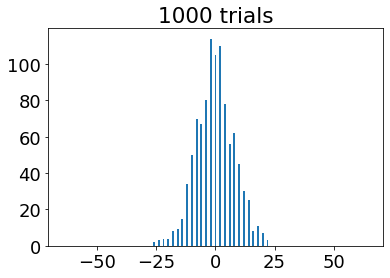

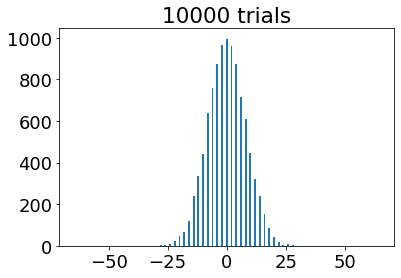

In [18]:
#Exercise 1; part 1: vary number of trials

ntrials = [10,100,1000,10000]

for j in range(len(ntrials)):
    PN = get_pN(x,ntrials[j])
    plt.figure(j)
    plt.title(str(ntrials[j])+" trials")
    plt.bar(x,PN)

In [19]:
#Exercise 1;Part 2: Normalize PN(x) such that sum = 1.0

def normalize(get_pN,x,ntrial):       #Function to normalize get_pN
    pN = get_pN(x,ntrial)
    return pN/ntrial                  #dividing result of get_pN by the number of trials

#printing results
example = normalize(get_pN,x,ntrial)        #using values from given example in first coding cell
print("Sum of PN(x)=",np.sum(example),"("+str(ntrial)+" trials)")

for k in range(len(ntrials)):
    E1P1 = normalize(get_pN,x,ntrials[k])   #using values used when plotting Exercise 1;Part 1
    print("Sum of PN(x)=",np.sum(E1P1),"("+str(ntrials[k])+" trials)") 

Sum of PN(x)= 1.0 (200 trials)
Sum of PN(x)= 1.0 (10 trials)
Sum of PN(x)= 1.0 (100 trials)
Sum of PN(x)= 1.0 (1000 trials)
Sum of PN(x)= 1.0 (10000 trials)


In [20]:
#Exercise 1; Part 3
nt3 = 17000                             #number of trials for this part3 of exercise 1

pn = normalize(get_pN,x,nt3)            #normalized pN with nt3 number of trials

[xN,x2,dxsn] = mean_x(x,pn)             #numerical averages

an_xN = (p-q)*N*l                       #analytical avg. xN
an_dxsn = 4*p*q*N*(l**2)                #analytical avg. (delta x_n)^2

print("numerical <xN>=",xN)
print("analytical <xN>=",an_xN)
print("\nnumerical <(delta x_N)^2>=",dxsn)
print("analytical <(delta x_N)^2>=",an_dxsn)
print()

#Exercise 1; Part 4: Determine the number of trials necessary to obtain (delta x_n)^2 to 1% accuracy
def error(an_dxsn,dxsn):
    return (abs(an_dxsn - dxsn)/an_dxsn)*100

print(str(nt3)+" trials= "+str(round(error(an_dxsn,dxsn),3))+"% accurate")

numerical <xN>= 0.045764705882353054
analytical <xN>= 0.0

numerical <(delta x_N)^2>= 63.76284676816609
analytical <(delta x_N)^2>= 64.0

17000 trials= 0.371% accurate


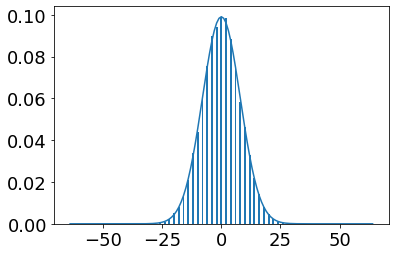

In [21]:
#Exercise 1;Part 5: Gaussian Distribution Approximation

pn5 = normalize(get_pN,x,10000)              #PN for part 5
[xN5,x25,dxsn5] = mean_x(x,pn5)              #numerical avg. for part 5

def Gaussian(x,dxsn):
    sigma2 = dxsn                   #sigma^2 = <(delta x_n)^2>
    avgx = np.sum(x)/len(x)         #<x>; average x
    power = -((x-avgx)**2)/(2*sigma2)       #-(x-<x>)^2/2(sigma^2)
    denominator = np.sqrt(sigma2*2*np.pi)   #squareroot((sigma^2)2*pi) = sigma*squareroot(2*pi)
    return (1/denominator)*np.exp(power)

#graph
plt.bar(x,pn5)
plt.plot(x,np.max(pn5)*Gaussian(x,dxsn5)/np.max(Gaussian(x,dxsn5)))     #plotted Gaussian curve like code in ex.2 

<x_N> = 25.650799999999997
analytical = 25.6

<(x_N)^2> =  711.8984

<(delta x_N)^2> = 53.934859360000246
analytical = 53.76


<BarContainer object of 129 artists>

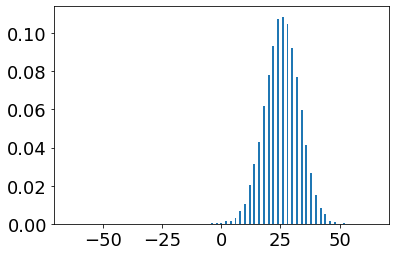

In [22]:
#Exercise 1;Part 6: Changing p to p=0.7
p = 0.7
q = 1 - p

pN6 = normalize(get_pN,x,10000)

[xN6,x2N6,dxsn6] = mean_x(x,pN6)
an_xN = (p-q)*N*l                       #analytical avg. xN
an_dxsn = 4*p*q*N*(l**2)                #analytical avg. (delta x_n)^2

print("<x_N> =",xN6)
print("analytical =",round(an_xN,2))
print()
print("<(x_N)^2> = ",x2N6)
print()
print("<(delta x_N)^2> =",dxsn6)
print("analytical =",round(an_dxsn,2))
plt.bar(x,pN6)    #not asked to graph but I did anyway

# Exercise 2: 2-D diffusion

Consider a collection of $N$ bees which are initially localized in a circle of unit radius centered on the origin. At each time step, each bee moves at random with equal probability to one of four possible directions. 

1. Comment "class bees" which models the "diffusion" of a bee swarm. 

2. Plot the bees as points and describe the qualitative nature of the motion of the swarm as a function of time. 

**JK: I'm assuming I'm allowed to just observe from the graphs already made...**

**I'm not sure what qualifies as an acceptable description of the "qualitive nature of motion ... as a function of time" but it appears that the bees will always have a high probability of ending somewhere near the center/origin by the end of the total nsteps.**

3. Suppose that each bee is given a random initial velocity in one of the four directions.  At each time interval, each bee takes a step of magnitude unity in the same direction as its original velocity.  Is the motion of the swarm changed from part 2?  

**JK: If I'm understanding the question correctly... yes. If they are always going to travel in the same direction (as the random initial velocity) for each step than it should be very different from the original random movement.(?)**

4. Compute $\langle x_N \rangle$, $\langle y_N \rangle$, $\langle \Delta x_N^2 \rangle$, and $\langle \Delta y_N^2 \rangle$ for both cases above. Also compute  the net mean square displacement
$$\langle \Delta R_N^2 \rangle = \langle \Delta x_N^2 \rangle + \langle \Delta y_N^2 \rangle - \langle x_N \rangle \langle x_N \rangle - \langle y_N \rangle \langle y_N \rangle $$
What is the qualitative dependence of these quantities on the number of time steps?  

5. Plot the diffusion coefficient $D(t) = \langle \Delta R_N^2(t) \rangle/(2 d t)$ (where $d$ is the spatial dimension, i.e., 2) as a function of time and compare your results with the analytical solution to the diffusion equation of the form
\begin{equation*}
P(x,t) = (2 \pi D t)^{-1/2} e^{-x^2/4 D t}
\end{equation*}
Note that the measure of "time" in this context is arbitrary.  The usual definition is that one unit of time corresponds to one Monte Carlo step per particle.  During one Monte Carlo step per particle, each particle attempts one jump *on the average*.

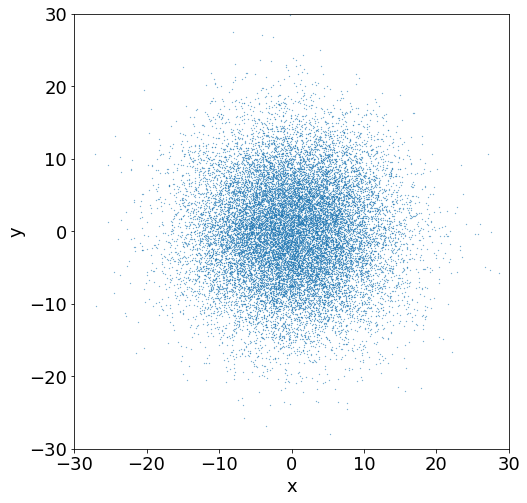

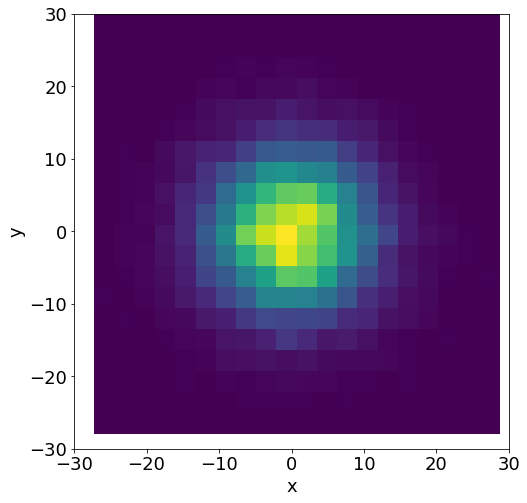

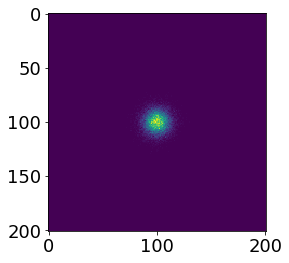

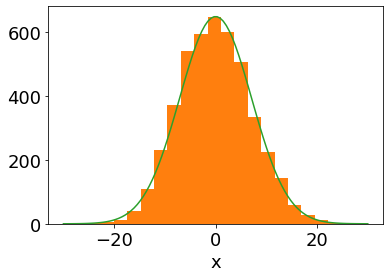

In [7]:
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.mplot3d import Axes3D

class bees:

    def __init__(self,N,nsteps):
        self.N = N                                   #N = number of bees
        self.x = np.arange(-nsteps,(nsteps+1),1)     #range of x values
        self.y = np.arange(-nsteps,(nsteps+1),1)     #range of y values
        self.xpos = -1 +2*np.random.rand(N)          #x displacement
        self.ypos = -1 +2*np.random.rand(N)          #y displacement
        self.vx = np.random.rand(N)                  #each bee has random initial x velocity (...direction?) (values = [0,1))
        self.vy = np.random.rand(N)                  #each bee has random initial y velocity (...direction?)
        self.p = 0.5                                 #probablity of certain direction
        self.stepsize = 1.0
        self.nsteps = nsteps                         #nsteps = the time interval in some sense?
        self.pN = np.zeros([2*nsteps+1,2*nsteps+1])

    def move_bees(self):                             #2D P_N(x) for bees
        for i in range(self.N):             #for each bee
            for _ in range(self.nsteps):         #for each number of steps
                r = rnd.random()                    #assign random direction 
                if (r <= 0.5):                      #travelled in x direction
                    if (rnd.random() <= self.p):        #positive x direction
                        self.xpos[i] = self.xpos[i] + self.stepsize
                    else:                               #negative x direction
                        self.xpos[i] = self.xpos[i] - self.stepsize
                else:                               #travelled in y direction
                    if (rnd.random() <= self.p):        #positive y direction
                        self.ypos[i] = self.ypos[i] + self.stepsize
                    else:                               #negative y direction 
                        self.ypos[i] = self.ypos[i] - self.stepsize
            j = int(round(self.xpos[i])) + nsteps
            k = int(round(self.ypos[i])) + nsteps
            self.pN[j,k] += 1
        self.pN = self.pN/self.pN.sum()             #normalized pN?
        
    def move_bees_v_init(self):
        #write your own code for part 3.
        self.step = 1/np.sqrt(2)          #made step smaller b/c I had issues when kept stepsize = 1
        for は in range(self.N):
            for 動 in range(self.nsteps):
                if (self.vx[は] <= 0.5) and (self.vy[は] <= 0.5):                      
                    self.xpos[は] = self.xpos[は] + self.step         #positive x direction
                    self.ypos[は] = self.ypos[は] + self.step         #positive y direction
                    
                elif (self.vx[は] > 0.5) and (self.vy[は] <= 0.5):                               
                    self.xpos[は] = self.xpos[は] - self.step         #negative x direction
                    self.ypos[は] = self.ypos[は] + self.step         #positive y direction
                    
                elif (self.vx[は] <= 0.5) and (self.vy[は] > 0.5):
                    self.xpos[は] = self.xpos[は] + self.step         #positive x direction
                    self.ypos[は] = self.ypos[は] - self.step         #negative y direction
                    
                elif (self.vx[は] > 0.5) and (self.vy[は] > 0.5):
                    self.xpos[は] = self.xpos[は] - self.step         #negative x direction
                    self.ypos[は] = self.ypos[は] - self.step         #negative y direction           
            J = int(round(self.xpos[は])) + self.nsteps
            K = int(round(self.ypos[は])) + self.nsteps
            self.pN[J,K] += 1
        self.pN = self.pN/self.pN.sum()             #normalized pN? 
                        
    def plot_bees(self,xmin,xmax):
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.plot(self.xpos,self.ypos,'.',markersize=0.5)     #plots the position of the bees (the blue & white graph)
        #plt.plot(self.xpos,self.ypos,'.',markersize=0.1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.hist2d(self.xpos,self.ypos,bins=[20,20])         #plots the blue/green/yellow histogram
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
    def plot_bees_1d(self,xmin,xmax,D):      #1D situation = probability of being in x direction I assume
        plt.figure()                       
        wh = np.where(abs(self.ypos) <= 2.0)
        plt.hist(self.xpos[wh[0]],bins=20)                  #plots histogram of 1D situation (the orange bar graph)
        h = plt.hist(self.xpos[wh[0]],bins=20)
        maxh = np.max(h[0:int(len(h)/2)])                   #max in the histogram (max probability)?
    
        plt.xlabel('x')
        x = np.linspace(xmin,xmax,100)
        fx = (2*np.pi*D*self.nsteps)**(-1./2.)*np.exp(-x**2/(4*D*self.nsteps))   #f(X) = like the Gaussian #D = sigma^2
        plt.plot(x,maxh*fx/np.max(fx))                      #Curve = max height(PN)*Gausssian/max of Gaussian
        plt.show()
        
    def mean_x(self):
        xbar = 0.0                                          #avg. x position
        xbar2 = 0.0                                         #avg. x position squared
        ybar = 0.0                                          #avg. y position etc.
        ybar2 = 0.0
        for j in range(len(self.y)):
            xbar += np.sum(self.x[:]*self.pN[:,j])
            xbar2 += np.sum(self.x[:]**2*self.pN[:,j])
        for i in range(len(self.x)):
            ybar += np.sum(self.y[:]*self.pN[i,:])
            ybar2 += np.sum(self.y[:]**2*self.pN[i,:])
        DeltaR2 = xbar2 + ybar2 - xbar*xbar - ybar*ybar     #DeltaR2 = similar to <(delta x_n)^2> of ex.1 I assume
        return xbar,xbar2,ybar,ybar2,DeltaR2
#---------------------------------------------------------------------------------------------------------------------
#below was already given, but does it count as part 2 being done?    
N = 20000                  #number of bees
nsteps = 100               #number of steps
maxx = 30                  #max x displacement (for 1D)
minx = -30                 #min x displacement (for 1D)

b = bees(N,nsteps)
b.move_bees()      
b.plot_bees(minx,maxx)

plt.figure()
plt.imshow(b.pN)           #plt.imshow = display an image
[xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
D = DR2/(2*2*nsteps)       #Diffusion Coefficient (2nd "2" is because dimensions,d = 2)
b.plot_bees_1d(minx,maxx,D)


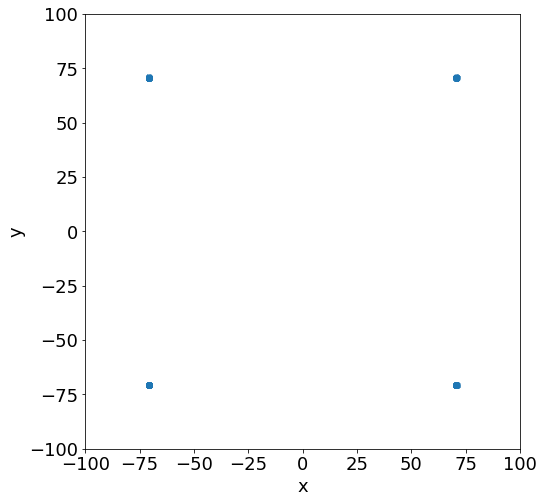

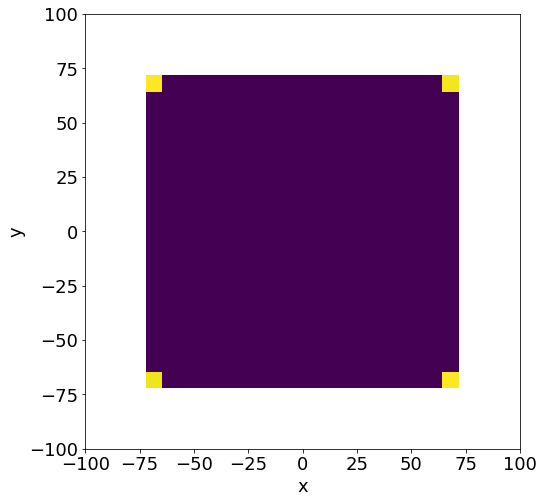

In [8]:
#Exericise 2; part 3: Bees moving in direction of initial velocity
Nj = 20000                  #"j" for Jasmine, b/c it's some of the only coding that I've had to do for this exercise
nstepsj = 100
jmax = 100                  #max x displacement
jmin = -100                 #min x displacement

jk = bees(Nj,nstepsj)

jk.move_bees_v_init()
jk.plot_bees(jmin,jmax)


In [9]:
#Exercise 2; part 4
print('for bee class "b"')
print("<xN> =",xbar)
print("<(Delta xN)^2>=",xbar2)
print("<yN> =",ybar)
print("<(Delta yN)^2> =",ybar2)
print("<(Delta RN)^2> =",DR2)
print()
[jxbar,jxbar2,jybar,jybar2,jDR2] = jk.mean_x()
print('for bee class with velocity ("jk")')
print("<xN> =",jxbar)
print("<(Delta xN)^2>=",jxbar2)
print("<yN> =",jybar)
print("<(Delta yN)^2> =",jybar2)
print("<(Delta RN)^2> =",jDR2)

for bee class "b"
<xN> = 0.006699999999999942
<(Delta xN)^2>= 49.7354
<yN> = -0.006899999999999972
<(Delta yN)^2> = 50.72670000000001
<(Delta RN)^2> = 100.46200750000001

for bee class with velocity ("jk")
<xN> = 0.19825000000000137
<(Delta xN)^2>= 5000.218250000001
<yN> = 0.10124999999999829
<(Delta yN)^2> = 5001.70095
<(Delta RN)^2> = 10001.869645375


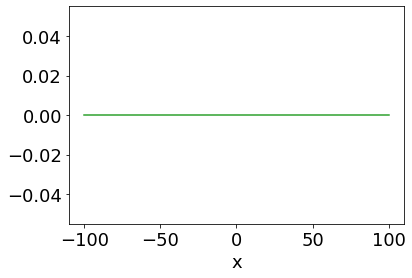

In [10]:
#Exercise 2; Part 5
d=2
Dj = jDR2/2*d*nstepsj

jk.plot_bees_1d(jmin,jmax,Dj)

I'm not even sure if I had to do the last cell for *part 5* with the bees with initial velocity, but I'm getting worried that I haven't done enough coding for this exercise. According to Wednesday's zoom video, it seems minimal coding is supposed to be the case for this entire last exercise, but it just feels weird. (But on the other hand, I guess to get it done within lab time/by Friday this seems like a reasonable amount to be expected to do.)

Hopefully I am done, but let me know if there actually was more that I had to do. 
-Jasmine